In [238]:
# encoding: utf-8
##############################################################################
## Algorithm for Countour Triangle     (equisize Triangule)              #####
##                                                                       #####
## 
## Authors: Karin Fornazier, Filipe Abdala
## Email: karin.fornazier@gmail.com
## Supervisor: F.B. Abdalla
## Latest Version June 2019
###########################################################################
###########################################################################
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
from scipy.integrate import quad
from scipy.interpolate import interp1d
from scipy.stats import norm
import matplotlib
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from astropy.io import fits
from math import pi, sin, cos, sqrt, log, floor
from sympy.physics.wigner import gaunt
import sys


#load file and matrix - usou loadtxt para evitar problemas com int ou qq outra coisa nos numeros

matrixf = np.loadtxt("B_ell_ell_Foregrounds_isosceles0.txt", delimiter=',')


In [239]:
#carregou a matriz com os valores de Bell
matrix_Bell = matrixf[:,0] 
matrix_Bella = matrixf[:,0]
matrix_Bellt=np.concatenate((matrix_Bell, matrix_Bella), axis=0)
matrix_Bellt=matrix_Bellt.T #gambi que fiz... nao tem razao logica...

In [240]:
#carregou a matriz com os valores de l3
matrix_ell3 = matrixf[:,3]
matrix_ell3a = matrixf[:,3]
matrix_ell3t=np.concatenate((matrix_ell3, matrix_ell3a), axis=0)

In [241]:
#carregou a matriz com os valores de l1=l2 aqui precisa de correcao pois os valores são espelhados
matrix_ell12 = matrixf[:,1]
matrix_ell12a = matrixf[:,2] 
matrix_ell12t=np.concatenate((matrix_ell12, matrix_ell12a), axis=0)

In [242]:
#matrix l3
#set the x dimension form matrix shape
Y =matrix_ell3t 
a = Y.max()
b = np.min(Y)
Yarr = np.arange(int(b),int(a)+1)

In [243]:
#matrix_ell1#set the x dimension form matrix shape
X =matrix_ell12t
a = X.max()
b = np.min(X)
Xarr = np.arange(int(b),int(a)+1)
sizex = Xarr.size

In [244]:
Bellmatrix = np.zeros((Xarr.size,Yarr.size))
for i in np.arange(matrix_Bellt.size):    
    Bellmatrix[int(matrix_ell12t[i]),int(matrix_ell3t[i])]=matrix_Bellt[i]

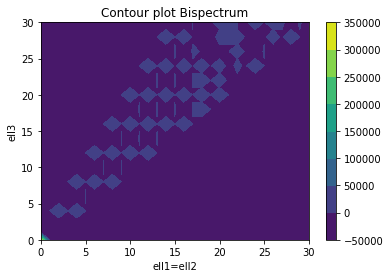

In [245]:
cp = plt.contourf(Xarr, Yarr, Bellmatrix.T,cmap=cm.viridis )

plt.colorbar(cp)
plt.title("Contour plot Bispectrum")
plt.xlabel('ell1=ell2')
plt.ylabel('ell3')

plt.show()